In [19]:
using StatisticalRethinking
using CairoMakie
using Turing
using Makie

#### Code 4.1 Random Walk

In [101]:
n_walks = 1000
n_steps = 16;
pos = Array{Float64, 2}(rand(Uniform(-1, 1), n_steps, n_walks));
pos[1, :] = zeros(n_walks);
csum = cumsum(pos, dims=1);
mx = minimum(csum) * 0.9

-5.871822909392551

#### Figure 4.2 Random Walk 

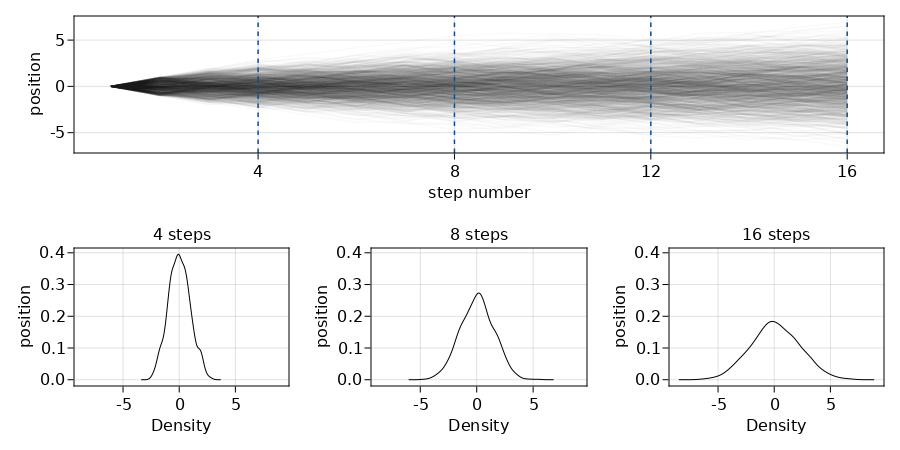

In [112]:
fig = Figure(resolution=(900,450))
ax = Axis(fig,xticks=0:4:16,xlabel="step number",ylabel="position")
for i in 1:size(csum)[2]
    CairoMakie.lines!(ax,csum[:,i], color=(:black,0.02))
end
Makie.vlines!(ax,4,linestyle=:dash,color=:dodgerblue4)
Makie.vlines!(ax,8,linestyle=:dash,color=:dodgerblue4)
Makie.vlines!(ax,12,linestyle=:dash,color=:dodgerblue4)
Makie.vlines!(ax,16,linestyle=:dash,color=:dodgerblue4)
fig[1,1:3] = ax
ax2,den2 = Makie.density(fig[2,1],csum[4,:],color=:transparent,strokewidth=1,
    axis=(title="4 steps",xlabel="Density",ylabel="position"))
ax3,den3 =Makie.density(fig[2,2],csum[8,:],color=:transparent,strokewidth=1,
    axis=(title="8 steps",xlabel="Density",ylabel="position"))
ax4,den4 = Makie.density(fig[2,3],csum[16,:],color=:transparent,strokewidth=1,
    axis=(title="16 steps",xlabel="Density",ylabel="position"))
linkaxes!(ax2,ax3,ax4)
fig

#### Code 4.2

In [115]:
prod( 1 .+ rand(Uniform(0,0.1),12))

1.6359167968857318

#### Code 4.3 Normal by Multiplication

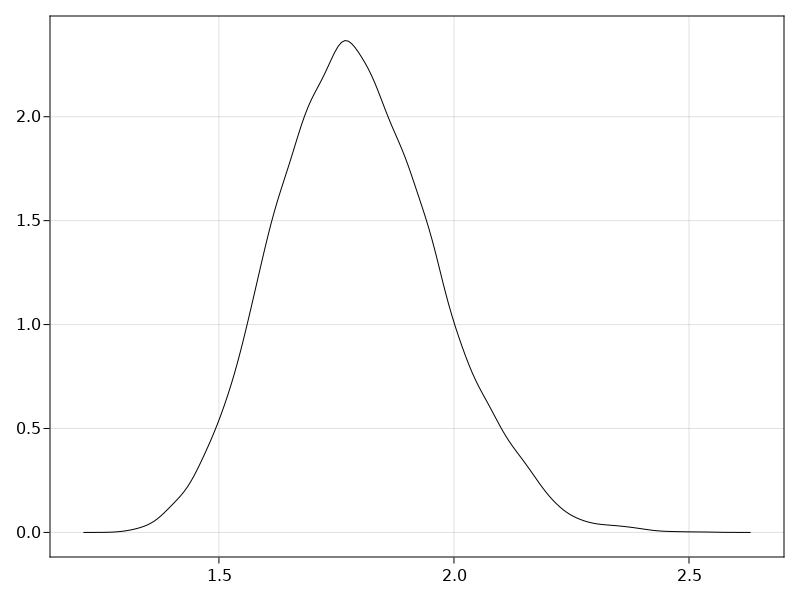

In [130]:
growth = [prod(1 .+ rand(Uniform(0,0.1),12)) for i in 1:1e4]
CairoMakie.density(growth, color=:transparent, strokewidth=1)

#### Code 4.4 - 4.5

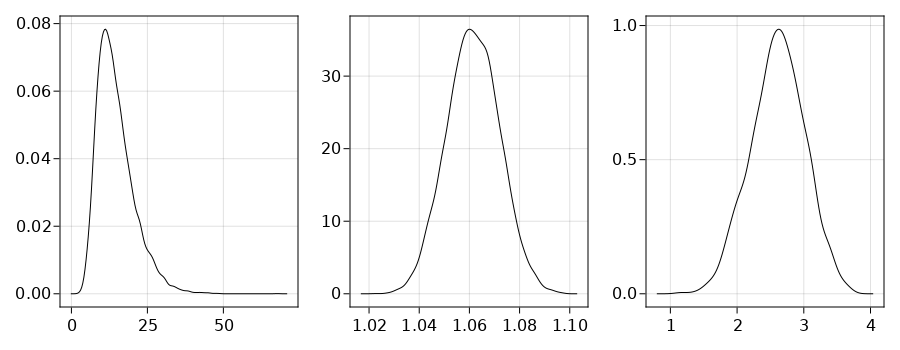

In [155]:
big = [prod(1 .+ rand(Uniform(0,0.5),12)) for i in 1:1e4]
small = [prod(1 .+ rand(Uniform(0,0.01),12)) for i in 1:1e4]
log_big = [log(prod(1 .+ rand(Uniform(0,0.5),12))) for i in 1:1000]

fig = Figure(resolution=(900,350))
ax = Axis(fig)
CairoMakie.density!(ax,big, color=:transparent, strokewidth=1)
fig[1,1] = ax

ax2 = Axis(fig)
CairoMakie.density!(ax2,small, color=:transparent, strokewidth=1)
fig[1,2] = ax2

ax3 = Axis(fig)
CairoMakie.density!(ax3,log_big, color=:transparent, strokewidth=1)
fig[1,3] = ax3
fig

#### Code 4.6

In [166]:
w = 6
n = 9
p_grid = range(0,stop=1,length=100)
posterior = pdf.(Binomial.(n,p_grid),w) .* pdf.(Uniform.(0,1),p_grid)
posterior = posterior / sum(posterior);

#### Code 4.7 - 4.9 Data loading and `precis` function

In [170]:
d = CSV.File(joinpath("data","Howell1.csv")) |> DataFrame;
precis(d)

┌────────┬────────────────────────────────────────────────────────────┐
│  param │    mean      std     5.5%      50%    94.5%      histogram │
├────────┼────────────────────────────────────────────────────────────┤
│ height │ 138.264  27.6024  81.1086   148.59  165.735  ▁▁▁▂▂▂▂▂▂██▆▁ │
│ weight │ 35.6106  14.7192   9.3607  40.0578  54.5029  ▁▃▄▄▃▂▃▆██▅▃▁ │
│    age │ 29.3444  20.7469      1.0     27.0   66.135      █▆▆▆▆▃▃▁▁ │
│   male │  0.4724   0.4997      0.0      0.0      1.0    █▁▁▁▁▁▁▁▁▁█ │
└────────┴────────────────────────────────────────────────────────────┘


- `precis` is a function from the StatisticalRethinking package

#### Code 4.10 Heights

In [171]:
d.height

544-element Vector{Float64}:
 151.765
 139.7
 136.525
 156.845
 145.415
 163.83
 149.225
 168.91
 147.955
 165.1
 154.305
 151.13
 144.78
   ⋮
 156.21
 152.4
 162.56
 114.935
  67.945
 142.875
  76.835
 145.415
 162.56
 156.21
  71.12
 158.75

#### Code 4.11 Data of individuals of age 18 and above

In [176]:
d2 = d[d.age .>=18,:]

,height,weight,age,male
,Float64,Float64,Float64,Int64
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0
6,163.83,62.9926,35.0,1
7,149.225,38.2435,32.0,0
8,168.91,55.48,27.0,1
9,147.955,34.8699,19.0,0


#### Figure 4.3 Prior predictive simulation for the height
#### Code 4.12 - 4.15

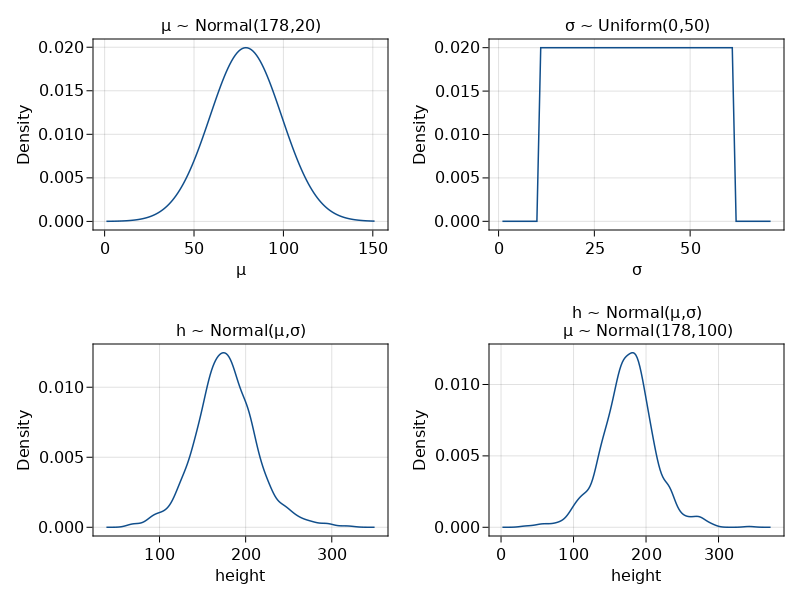

In [204]:
fig = Figure()

# Code 4.12
ax1 = Axis(fig,title = "μ ~ Normal(178,20)",ylabel="Density", xlabel="μ")
Makie.lines!(ax1,pdf(Normal(178,20),100:250),color=:dodgerblue4)
fig[1,1]= ax1

# Code 4.13
ax2 = Axis(fig, title = "σ ~ Uniform(0,50)",ylabel="Density",xlabel="σ")
Makie.lines!(ax2,pdf(Uniform(0,50),-10:60),color=:dodgerblue4)
fig[1,2]= ax2

# Code 4.14
sample_μ = rand(Normal(178,20),1000)
sample_σ = rand(Uniform(0,50),1000)
prior_h = rand.(Normal.(sample_μ,sample_σ))

ax3 = Axis(fig, title = "h ~ Normal(μ,σ)",ylabel="Density", xlabel="height")
Makie.density!(ax3,prior_h,color=:transparent,strokewidth=1.5,strokecolor=:dodgerblue4)
fig[2,1] = ax3

# Code 4.15
μ = rand(Normal(178,100),1000)
σ = rand(Uniform(0,50),1000)
h = rand.(Normal.(sample_μ,sample_σ))

ax4 = Axis(fig, title = "h ~ Normal(μ,σ)
    μ ~ Normal(178,100)", ylabel="Density",xlabel="height")
Makie.density!(ax4,h,color=:transparent,strokewidth=1.5,strokecolor=:dodgerblue4)
fig[2,2] = ax4

fig

#### Code 4.27

In [218]:
@model function heights(h)
    σ ~ Uniform(0,50)
    μ ~ Normal(178,20)
    h .~ Normal(μ,σ)
end

heights (generic function with 1 method)

#### Code 4.29

In [229]:
m4_1 = heights(d2.height)
ch1 = sample(m4_1, NUTS(),1000)

┌ Info: Found initial step size
│   ϵ = 0.2
└ @ Turing.Inference C:\Users\axs162731\.julia\packages\Turing\Gntg0\src\inference\hmc.jl:188
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\axs162731\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\axs162731\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\axs162731\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


Chains MCMC chain (1000×14×1 Array{Float64, 3}):

Iterations        = 1:1000
Thinning interval = 1
Chains            = 1
Samples per chain = 1000
parameters        = μ, σ
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth

Summary Statistics
  parameters       mean       std   naive_se      mcse         ess      rhat 
      Symbol    Float64   Float64    Float64   Float64     Float64   Float64 

           μ   154.6025    0.4259     0.0135    0.0146   1007.4926    1.0006
           σ     7.7856    0.2913     0.0092    0.0093   1067.7929    0.9993

Quantiles
  parameters       2.5%      25.0%      50.0%      75.0%      97.5% 
      Symbol    Float64    Float64    Float64    Float64    Float64 

           μ   153.7099   154.3423   154.5993   154.8840   155.4865
           σ     7.2375     7.5690     7.7852     7.9810     8.3408


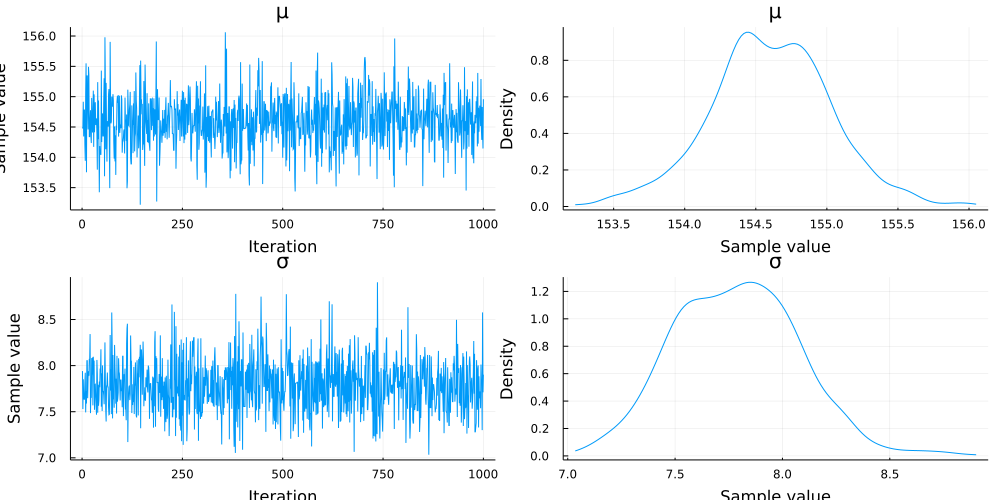

In [250]:
using Plots
Plots.plot(ch1)

#### Code 4.34 Sampling from the posterior

In [245]:
post = DataFrame(sample(ch1,10000))
first(post,6)

,μ,σ
,Float64,Float64
1,154.948,7.45566
2,154.644,7.88677
3,154.783,7.40651
4,154.166,8.02788
5,154.922,7.96396
6,154.618,7.20959


#### Code 4.35

In [243]:
precis(post)

┌───────┬───────────────────────────────────────────────────────┐
│ param │    mean     std     5.5%     50%    94.5%   histogram │
├───────┼───────────────────────────────────────────────────────┤
│     μ │ 154.603  0.4253  153.906   154.6  155.258     ▁▂▇█▃▁▁ │
│     σ │  7.7827  0.2924   7.3301  7.7853   8.2514  ▁▃▇██▅▂▁▁▁ │
└───────┴───────────────────────────────────────────────────────┘
